## Data Description:
The Haberman's survival dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

## Attribute Information:
    1.Age of patient at the time of operation (numerical)
    2.Patient's year of operation (year - 1900, numerical)
    3.Number of positive axillary nodes detected (numerical)
    4.Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 years

In [132]:
# Import required packages 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

#Read Haberman dataset 
haberman_df=pd.read_csv("C:/Users/Giri/data/haberman.csv",header=None,
                        names=['patient_age','year_of_operation','positive_lymphs','survival_status'])
               

In [133]:
#Display column names
print(haberman_df.columns)

Index(['patient_age', 'year_of_operation', 'positive_lymphs',
       'survival_status'],
      dtype='object')


In [134]:
# Shape of Dataset
print(haberman_df.shape)

(306, 4)


In [135]:
#Index details
print(haberman_df.index)

RangeIndex(start=0, stop=306, step=1)


In [136]:
# Indentify Unique values for categoriztion/Grouping
print(list(haberman_df['survival_status'].unique()))

[1, 2]


In [137]:
#View first 10 rows
print(haberman_df.head(10))

   patient_age  year_of_operation  positive_lymphs  survival_status
0           30                 64                1                1
1           30                 62                3                1
2           30                 65                0                1
3           31                 59                2                1
4           31                 65                4                1
5           33                 58               10                1
6           33                 60                0                1
7           34                 59                0                2
8           34                 66                9                2
9           34                 58               30                1


In [138]:
#Print column data types
print(haberman_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
patient_age          306 non-null int64
year_of_operation    306 non-null int64
positive_lymphs      306 non-null int64
survival_status      306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None


## 1. Observations: 
    . Data set does not contain N/A or missing values,therefor no data massaging.
    . For better readability and efficient memory utilization,survival status 1 (survived after 5 years) and 2(Not Survived after 5  years) are labelled as 'Survied'(1) and 'Not Survived'(2).Hence,their data type is changed to category. 

In [139]:
# Mapping survival status values to meaningfull names.
haberman_df['survival_status']=haberman_df['survival_status'].map({1:'Survived',2:'Not Survived'})
haberman_df['survival_status']=haberman_df['survival_status'].astype('category')



In [140]:
#Display column data types after convertion.
print(haberman_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
patient_age          306 non-null int64
year_of_operation    306 non-null int64
positive_lymphs      306 non-null int64
survival_status      306 non-null category
dtypes: category(1), int64(3)
memory usage: 7.6 KB
None


## 2.High Level Stastics:

In [141]:
print(haberman_df.describe())

       patient_age  year_of_operation  positive_lymphs
count   306.000000         306.000000       306.000000
mean     52.457516          62.852941         4.026144
std      10.803452           3.249405         7.189654
min      30.000000          58.000000         0.000000
25%      44.000000          60.000000         0.000000
50%      52.000000          63.000000         1.000000
75%      60.750000          65.750000         4.000000
max      83.000000          69.000000        52.000000


### (2.1) Mean & Standard Deviation

In [142]:
print("Mean")
print("----")
print("Patient Age :")
print(np.mean(haberman_df["patient_age"]))

print("Year Of Operations :")
print(np.mean(haberman_df["year_of_operation"]))
print("Postiive Lymphs nodes :")
print(np.mean(haberman_df["positive_lymphs"]))
print(" "*40)
print("Standard Deviation")
print("------------------")
print("Patient Age :")
print(np.std(haberman_df["patient_age"]))

print("Year of Operations :")
print(np.std(haberman_df["year_of_operation"]))

print("Positive Lymphs :")
print(np.std(haberman_df["positive_lymphs"]))

print(" "*40)
print("Median")
print("------")
print("Patient Age :")
print(np.median(haberman_df["patient_age"]))

print("Year of Operations :")
print(np.median(haberman_df["year_of_operation"]))

print("Positive Lymphs :")
print(np.median(haberman_df["positive_lymphs"]))


Mean
----
Patient Age :
52.45751633986928
Year Of Operations :
62.85294117647059
Postiive Lymphs nodes :
4.026143790849673
                                        
Standard Deviation
------------------
Patient Age :
10.78578520363183
Year of Operations :
3.244090833563246
Positive Lymphs :
7.177896092811152
                                        
Median
------
Patient Age :
52.0
Year of Operations :
63.0
Positive Lymphs :
1.0


### (2.3) Range,Percentiles,IQR ,MAD

In [143]:
print("Range")
print("------")
print("Patient Age :")
print(np.ptp(haberman_df["patient_age"]))

print("Year of Operations :")
print(np.ptp(haberman_df["year_of_operation"]))

print("Positive Lymphs :")
print(np.ptp(haberman_df["positive_lymphs"]))

print(""*40)

from statsmodels import robust
print("Mean Absolute Deviation")
print("------")
print("Patient Age :")
print(robust.mad(haberman_df["patient_age"]))

print("Year of Operations :")
print(robust.mad(haberman_df["year_of_operation"]))

print("Positive Lymphs :")
print(robust.mad(haberman_df["positive_lymphs"]))

print(""*40)

print("Quantiles:")
print("----------")
print("Patient Age :")
print(np.percentile(haberman_df["patient_age"],np.arange(0, 100, 25)))
print("Year of Operations :")
print(np.percentile(haberman_df["year_of_operation"],np.arange(0, 100, 25)))
print("Positive Lymphs :")
print(np.percentile(haberman_df["positive_lymphs"], np.arange(0, 100, 25)))

print(""*40)

print("\n90th Percentiles:")
print("-------------------")
print("Patient Age :")
print(np.percentile(haberman_df["patient_age"],90))
print("Year of Operations :")
print(np.percentile(haberman_df["year_of_operation"],90))
print("Positive Lymphs :")
print(np.percentile(haberman_df["positive_lymphs"],90))


Range
------
Patient Age :
53
Year of Operations :
11
Positive Lymphs :
52

Mean Absolute Deviation
------
Patient Age :
11.860817748
Year of Operations :
4.44780665552
Positive Lymphs :
1.48260221851

Quantiles:
----------
Patient Age :
[ 30.    44.    52.    60.75]
Year of Operations :
[ 58.    60.    63.    65.75]
Positive Lymphs :
[ 0.  0.  1.  4.]


90th Percentiles:
-------------------
Patient Age :
67.0
Year of Operations :
67.0
Positive Lymphs :
13.0


### Insights: 
    .Total of 306 patients,whose age is between from 30 to 83 years and the average age of patient is 52 years,have 
    undrergone the surgery.   
    .Total number of positive lymphs observed is 52 and the average is 4 postive lypmhs,75% of the patinets show less than 4 positive lymphs and 25% shows 0 postive lymphs.
    .Patient age between 30 to 44 shows no sign of positive lymph.
    .There are 306 observations in the dataset.
    .73% patiens shows Survived and 26% shows not survived.

### Objective:
    . To predict whether the patient will survice afater 5 years of treatement/operation,depending upon age,number of 
    positive lymphs.

## 5.Univariate Analysis

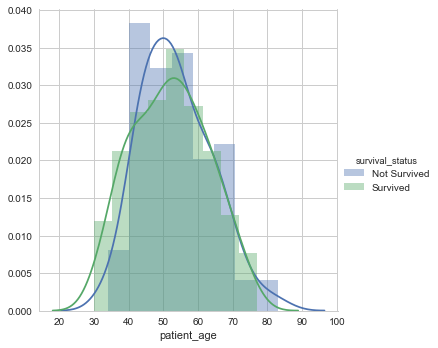

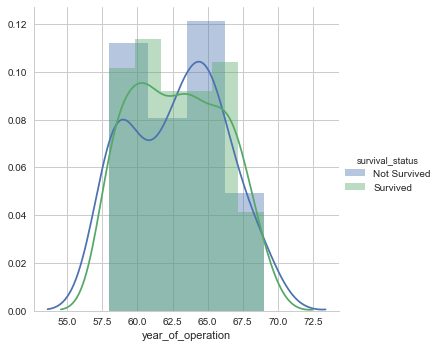

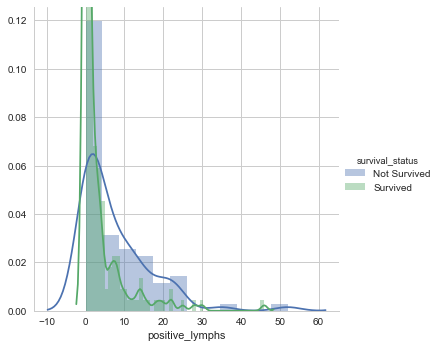

In [151]:
#Distribution plots 
"""
* Distribution plots are used to visually assess how the data points are distributed with respect to its frequency.
* Usually the data points are grouped into bins and the height of the bars representing each group increases with increase in the number of data points 
lie within that group. (histogram)
* Probality Density Function (PDF) is the probabilty that the variable takes a value x. (smoothed version of the histogram)
* Kernel Density Estimate (KDE) is the way to estimate the PDF. The area under the KDE curve is 1.
* Here the height of the bar denotes the percentage of data points under the corresponding group
"""

for col_id, features in enumerate(list(haberman_df.columns)[:-1]):
    fg = sns.FacetGrid(haberman_df, hue='survival_status', size=5)
    fg.map(sns.distplot, features).add_legend()
plt.show()

********* patient_age *********
Bin Edges: [ 30.   35.3  40.6  45.9  51.2  56.5  61.8  67.1  72.4  77.7  83. ]
PDF: [ 0.05228758  0.08823529  0.1503268   0.17320261  0.17973856  0.13398693
  0.13398693  0.05882353  0.02287582  0.00653595]
CDF: [ 0.05228758  0.14052288  0.29084967  0.46405229  0.64379085  0.77777778
  0.91176471  0.97058824  0.99346405  1.        ]
********* year_of_operation *********
Bin Edges: [ 58.   59.1  60.2  61.3  62.4  63.5  64.6  65.7  66.8  67.9  69. ]
PDF: [ 0.20588235  0.09150327  0.08496732  0.0751634   0.09803922  0.10130719
  0.09150327  0.09150327  0.08169935  0.07843137]
CDF: [ 0.20588235  0.29738562  0.38235294  0.45751634  0.55555556  0.65686275
  0.74836601  0.83986928  0.92156863  1.        ]
********* positive_lymphs *********
Bin Edges: [  0.    5.2  10.4  15.6  20.8  26.   31.2  36.4  41.6  46.8  52. ]
PDF: [ 0.77124183  0.09803922  0.05882353  0.02614379  0.02941176  0.00653595
  0.00326797  0.          0.00326797  0.00326797]
CDF: [ 0.77124183

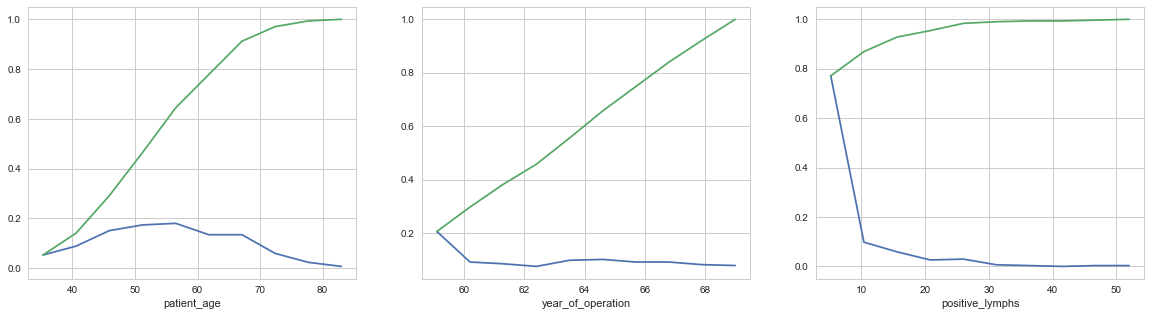

In [153]:
#5.2 CDF 

plt.figure(figsize=(20,5))
for col_id, feature in enumerate(list(haberman_df.columns)[:-1]):
    plt.subplot(1, 3, col_id+1)
    print("********* "+feature+" *********")
    counts, bin_edges = np.histogram(haberman_df[feature], bins=10, density=True)
    print("Bin Edges: {}".format(bin_edges))
    pdf = counts/sum(counts)
    print("PDF: {}".format(pdf))
    cdf = np.cumsum(pdf)
    print("CDF: {}".format(cdf))
    plt.plot(bin_edges[1:], pdf, bin_edges[1:], cdf)
    plt.xlabel(feature)
plt.show()
    

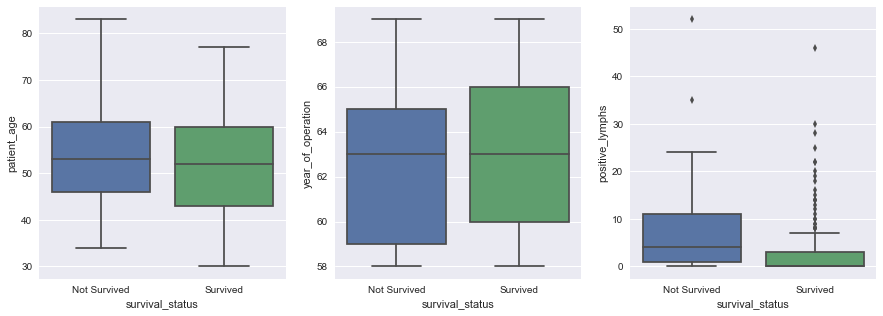

In [146]:
#5.3 Box plots 
"""
Five number summary of the data points in a box. 
The outliers are displayed as points outside the box.
1. Q1 - 1.5*IQR
2. Q1 (25th percentile)
3. Q2 (50th percentile or median)
4. Q3 (75th percentile)
5. Q3 + 1.5*IQR
Inter Quartile Range = Q3 -Q1
"""
plt.figure(figsize=(15,5))
for col_id,features in enumerate(list(haberman_df.columns)[:-1]):
    plt.subplot(1,3,col_id+1)
    sns.boxplot(x='survival_status',y=features,data=haberman_df)  
plt.show()

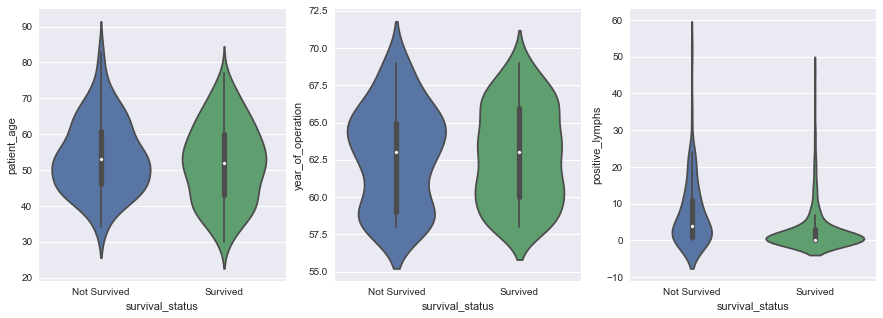

In [147]:
#5.4 Voilin Plots
"""
Voilin plots are combination of Box plot and probability density function.

"""
plt.figure(figsize=(15,5))
for col_id,features in enumerate(list(haberman_df.columns)[:-1]):
    plt.subplot(1,3,col_id+1)
    sns.violinplot(x='survival_status',y=features,data=haberman_df)  
plt.show()

### Observations: 
    . The number of postive lymph nodes highly densed between 0 to 5 and greater chances of survival(#5.1) 
    . Almost 80% of the people have less than or equal to 5 postive lymph nodes(#5.2)
    . Patients who treated after 1966 have higher chance of survival,than the rest.Patients operated before 1959 have less chance of survival.(#5.3 and #5.4)

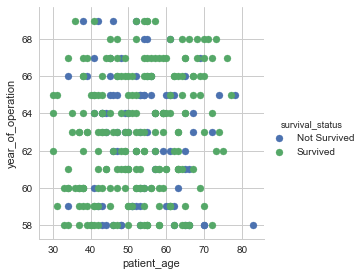

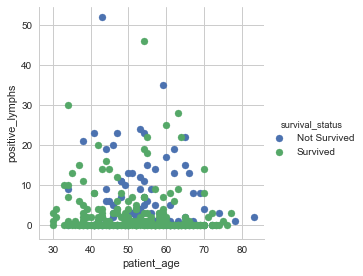

In [148]:
## 2D Scatter plots 
sns.set_style("whitegrid");
sns.FacetGrid(haberman_df, hue="survival_status", size=4) \
   .map(plt.scatter, "patient_age", "year_of_operation") \
   .add_legend();
plt.show();

sns.set_style("whitegrid");
sns.FacetGrid(haberman_df, hue="survival_status", size=4) \
   .map(plt.scatter, "patient_age", "positive_lymphs") \
   .add_legend();
plt.show();



## 6.MultiVariate Analysis 
      

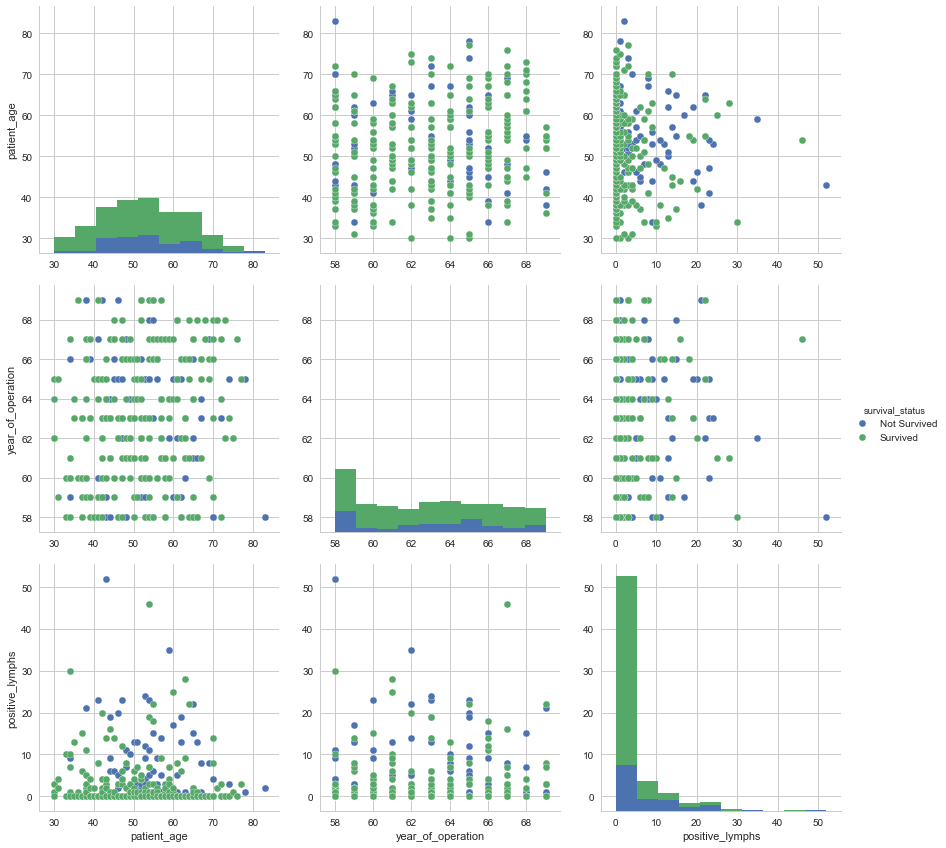

In [149]:
#Pair Plot 
#Below Pair plot shows differences between two varialbles accross the three columns combination. 
sns.pairplot(haberman_df,hue='survival_status',size=4)
plt.show()

## Observations:
    .Data point distribution between postive lymph nodes & year of operation,shows better separation between Survival & Not survived.
    

## Conclusion: 
    .80% of the patinets show less than 5 positive lymphs and the age greater than 60,treated/operated after 1965 shows 
    higher chance of Survival.